# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [94]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from panel.interact import interact

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')

In [95]:
# Read the Mapbox API key
mapbox_token = os.getenv("MAPBOX_TOKEN")
px.set_mapbox_access_token(mapbox_token)

# Import Data

In [96]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
#print(sfo_data.tail())
sfo_data.tail()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2016,Telegraph Hill,903.049771,384242,4390
2016,Twin Peaks,970.085470,384242,4390
2016,Van Ness/ Civic Center,552.602567,384242,4390
2016,Visitacion Valley,328.319007,384242,4390
2016,Westwood Park,631.195426,384242,4390


In [97]:
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [98]:
def housing_units_per_year():
    """Housing Units Per Year as a bar chart."""
    mean_units= sfo_data.groupby('year').mean().reset_index()
    mean_units_title= "Housing units in San Francisco from 2010-2016"
    y_lim= [370000, 387500]
    plot_housing_units= px.bar(mean_units,
                              x="year",
                              y="housing_units",
                              title= mean_units_title,
                              range_y= y_lim,
                              labels= {"housing_units": "Housing Units",
                                      "year": "Year"})
    return pn.panel(plot_housing_units)

 #   fig_mean_units_plot= mean_units['housing_units'].plot(
 #   kind='bar',
 #   title= mean_units_title,
 #   ylim= y_lim)
  #  fig_mean_units_plot
#plt.show()


In [99]:
housing_units_per_year()

Plotly(Figure)

In [100]:
def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year as a line chart."""
    average_gross_rent= sfo_data.groupby(["year"]).mean().reset_index()
    average_gross_rent.drop(columns=["housing_units"], inplace=True)
    plot_avg_gross_rent= px.line(average_gross_rent,
                                title= "Average Gross Rent in San Francisco",
                                x= "year",
                                y= "gross_rent",
                                labels= {"year": "Year",
                                        "gross_rent": "Gross Rent"})
    return plot_avg_gross_rent
    
    #fig_gross_rent= average_gross_rent
    #plt.plot(fig_gross_rent["gross_rent"])
    #plt.title('Average Gross Rent in San Francisco', fontsize=15)
    #plt.xlabel("Year", fontsize=10)
    #plt.ylabel("gross_rent", fontsize=10)
    #plt.plot(fig_gross_rent["gross_rent"])
#plt.show()

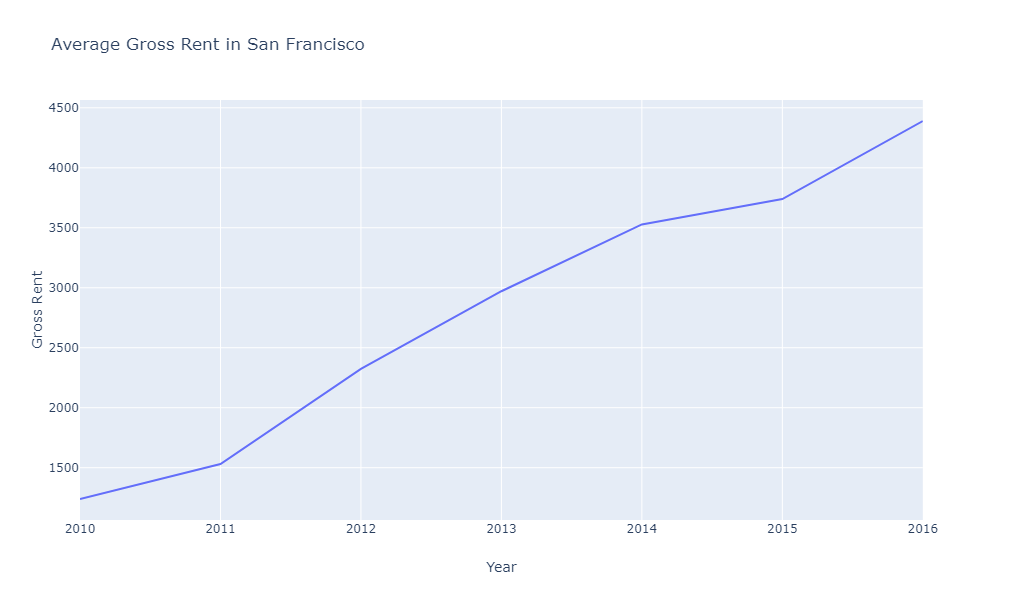

In [101]:
average_gross_rent()

In [102]:
def average_sales_price():
    """Average Sales Price Per Year as line chart."""
    plot_title= "Average sale price per SQ foot in San Francisco"
    avg_sq_ft_sale= sfo_data.groupby(["year"]).mean().reset_index()
    plot_average_sales_price= px.line(avg_sq_ft_sale,
                                     title= plot_title,
                                     x= "year",
                                     y= "sale_price_sqr_foot",
                                     labels= {"year": "year",
                                             "sale_price_sqr_foot": "Average Sale price Sq foot"})
    return plot_average_sales_price
    
#plt.title(plot_title)
#plt.xlabel("Year", fontsize= 10)
#plt.ylabel("Average sale price", fontsize= 10)
#plt.plot(avg_sq_ft_sale["sale_price_sqr_foot"])
#plt.show()
   

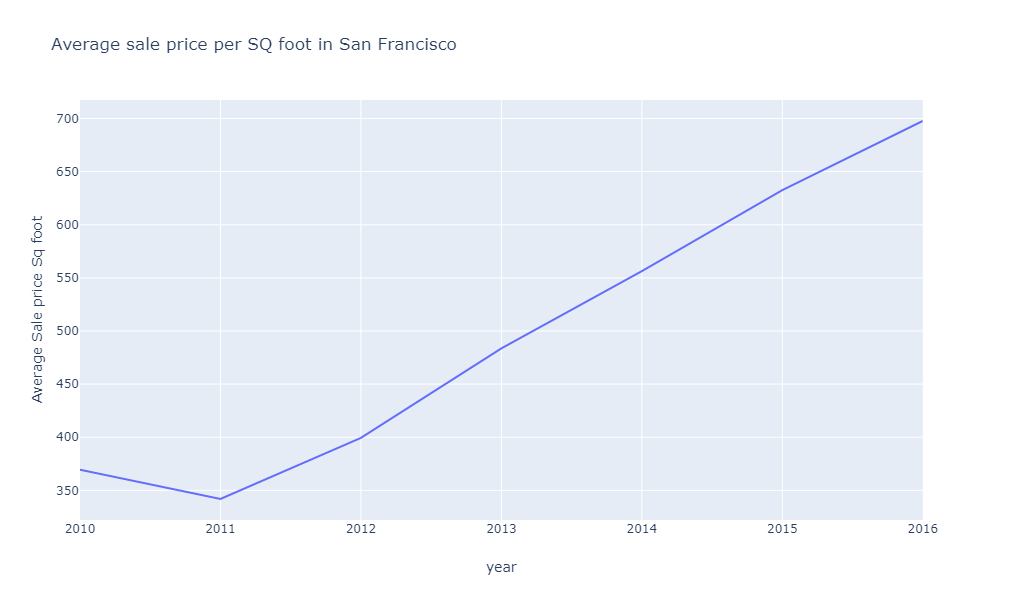

In [103]:
average_sales_price()

In [104]:
def average_price_by_neighborhood():
    """Average Prices by Neighborhood interactive."""
    avg_price_by_hood= sfo_data.groupby(by=["neighborhood", "year"]).mean()
    list_hood= sfo_data["neighborhood"].tolist()

    def avg_price(neighborhood):
        df= avg_price_by_hood.loc[neighborhood].drop(columns= ['housing_units', 'gross_rent'])

        return df.hvplot(
            title= f'Neighborhood: {neighborhood}',
            xlabel= 'Year',
            ylabel= 'Average Sale price per SQ foot')

    return interact(avg_price, neighborhood= list_hood)

In [105]:
average_price_by_neighborhood()

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02038')

In [106]:
def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    avg_hood_price= sfo_data.groupby(by=["neighborhood"]).mean()
    avg_hood_price_ascending= avg_hood_price.sort_values('sale_price_sqr_foot', ascending=False)
    top10= avg_hood_price_ascending.head(10).drop(columns=["housing_units", "gross_rent"])
    plot_top10= top10.hvplot(
        kind="bar", 
        title= "Top 10 mos expensive neighborhoods in SF", 
        x="neighborhood",
        y="sale_price_sqr_foot",
        xlabel= "Neighborhood", 
        ylabel="SQ food sale price (Avg)", 
        rot=90,
        height= 500)
    
    return pn.panel(plot_top10)
    

In [107]:
top_most_expensive_neighborhoods()

HoloViews(Bars)

In [108]:
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    avg_hood_price= sfo_data.groupby(by=["neighborhood"]).mean()
    avg_hood_price_ascending= avg_hood_price.sort_values('sale_price_sqr_foot', ascending=False)
    top10= avg_hood_price_ascending[:10].round(2).drop(columns=["housing_units", "gross_rent"])

    para_cord= px.parallel_coordinates(
        avg_hood_price_ascending[:10],
        dimensions= ['sale_price_sqr_foot', 'housing_units', 'gross_rent'],
        color= 'sale_price_sqr_foot',
        color_continuous_scale= px.colors.sequential.Inferno,
        labels={"sale_price_sqr_foot": "Price SQ foot",
               "housing_units": "Housing Units",
               "gross_rent": "Gross Rent"},)
    
    return pn.panel(para_cord)   

In [109]:
parallel_coordinates()

Plotly(Figure)

In [110]:
def parallel_categories():
    """Parallel Categories Plot."""
    avg_hood_price= sfo_data.groupby(by=["neighborhood"]).mean()
    avg_hood_price_ascending= avg_hood_price.sort_values('sale_price_sqr_foot', ascending=False)
    top10= avg_hood_price_ascending[:10].round(2).drop(columns=["housing_units", "gross_rent"])
    
    parallel_category_plot= px.parallel_categories(
        avg_hood_price_ascending[:10].reset_index(),
        dimensions= ['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent'],
        color= 'sale_price_sqr_foot',
        color_continuous_scale= px.colors.sequential.Inferno,
        labels={"neighborhood": "Neighborhood",
            "sale_price_sqr_foot": "Price SQ foot",
           "housing_units": "Housing Units",
           "gross_rent": "Gross Rent",
    },)

    return parallel_category_plot
    # YOUR CODE HERE!

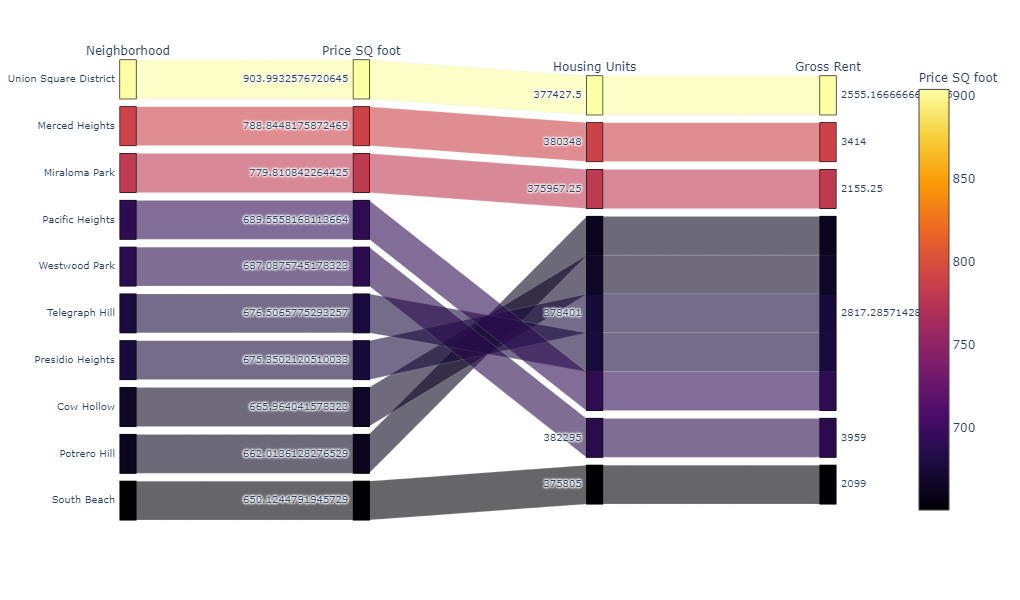

In [111]:
parallel_categories()

In [112]:
def neighborhood_map():
    """Neighborhood Map"""
    file_path = Path("Data/neighborhoods_coordinates.csv")
    df_neighborhood_locations = pd.read_csv(file_path)
    df_neighborhood_locations.set_index(["Neighborhood"], inplace=True)
    sf_mean_value_neighborhood= sfo_data.groupby(by=["neighborhood"]).mean()
    sf_mean_value_neighborhood.drop(columns=['housing_units'], inplace=True)
    join_lat_mean= pd.concat([df_neighborhood_locations, sf_mean_value_neighborhood], axis=1, join="inner")
    return px.scatter_mapbox(join_lat_mean, lat="Lat", lon="Lon", color="sale_price_sqr_foot")

In [117]:
neighborhood_map()

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [121]:
# combine all the plots
tab_1_column= pn.panel(neighborhood_map())
tab_2_row= pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())
tab_3_column= pn.Column(average_price_by_neighborhood(), top_most_expensive_neighborhoods())
tab_4_column= pn.Column(parallel_coordinates(), parallel_categories())

#create dashboard tabs
sf_housing_dasboard= pn.Tabs(
    ("Welcome", tab_1_column),
    ("Yearly Market Analysis", tab_2_row),
    ("Neighborhood Analysis", tab_3_column),
    ("Parallel Plot Analysis", tab_4_column))
sf_housing_dasboard

Tabs
    [0] Str(Empty)
    [1] Row
        [0] Str(Empty)
        [1] Str(Empty)
        [2] Str(Empty)
    [2] Column
        [0] Str(Empty)
        [1] Str(Empty)
    [3] Column
        [0] Str(Empty)
        [1] Str(Empty)

## Serve the Panel Dashboard

In [122]:
sf_housing_dasboard.servable()

Tabs
    [0] Str(Empty)
    [1] Row
        [0] Str(Empty)
        [1] Str(Empty)
        [2] Str(Empty)
    [2] Column
        [0] Str(Empty)
        [1] Str(Empty)
    [3] Column
        [0] Str(Empty)
        [1] Str(Empty)